In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Read .csv data and prase dates
bshr = pd.read_csv("day.csv", parse_dates=['dteday'])

In [2]:
bshr.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## Now, let us try several thing to take a better control
# Delete columns 'casual' & 'registered' as these sums up to column 'cnt'. Also let's drop 'instant' column as this is index

bshr.drop(['instant','casual','registered','dteday'], axis=1, inplace=True)

In [4]:
bshr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bshr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [6]:
## Now let's try to use string values for season, mnth, workingday & weathersit
conv = {"season": {1:"spring", 2:"summer", 3:"fall", 4:"winter"},
        "mnth": {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},
        "weekday": {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},
        "weathersit": {1:'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'}}

bshr = bshr.replace(conv)
bshr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bshr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [8]:
bshr.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
# Now let's see if there are any missing values or not - If exists, then we need to take proper measure
count = bshr.isnull().sum()
print(count)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


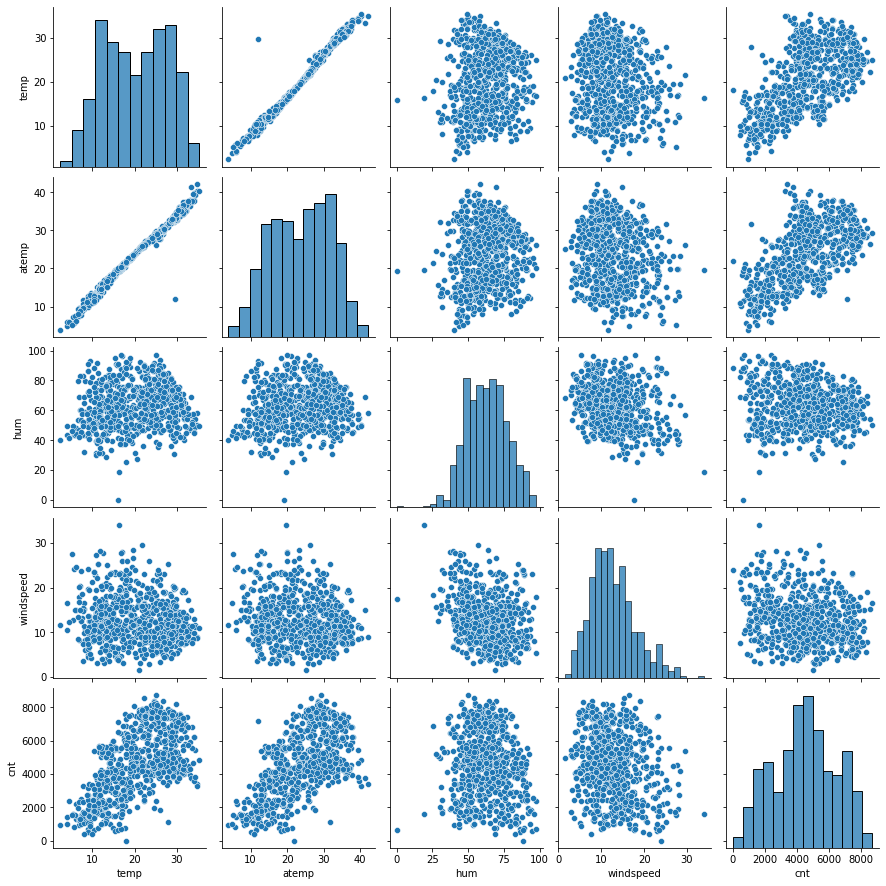

In [10]:
# No missing values - so we can proceed to next step. Visuaization.
# Step 1 - Visualisation for numeric variables
import matplotlib.pyplot as plt
import seaborn as sns

bshr_num = bshr[['temp','atemp','hum','windspeed','cnt']]

sns.pairplot(bshr_num)
plt.show()

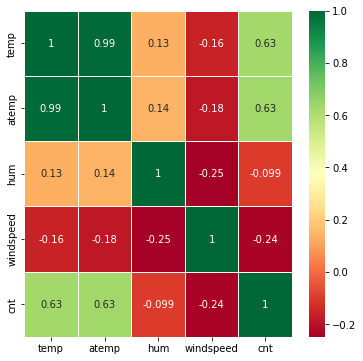

In [11]:
plt.figure(figsize = (6,6))
ax= sns.heatmap(bshr_num.corr(), annot = True, cmap="RdYlGn", linewidth =1)
plt.show()

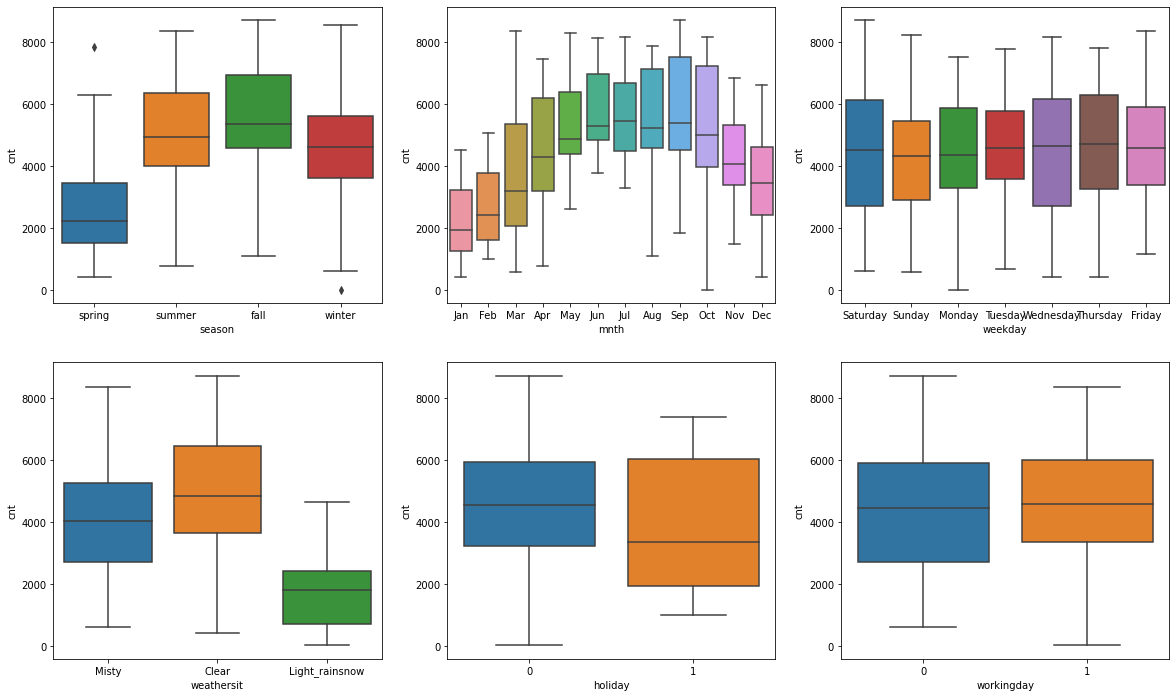

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bshr)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bshr)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bshr)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bshr)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bshr)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bshr)
plt.show()

In [13]:
# Let us now create dummy variables
sson = pd.get_dummies(bshr['season'], drop_first = True)
weather = pd.get_dummies(bshr['weathersit'], drop_first = True)
month = pd.get_dummies(bshr['mnth'], drop_first = True)
wkday = pd.get_dummies(bshr['weekday'], drop_first = True)
bkshr = pd.concat([bshr,sson,weather,month,wkday], axis = 1)

In [14]:
bkshr.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0


In [15]:
bkshr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  Light_rainsnow  730 non-null    uint8  
 16  Misty           730 non-null    uint8  
 17  Aug             730 non-null    uin

In [16]:
bkshr.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bkshr.shape

(730, 30)

In [17]:
# Now let us split into train & test
from sklearn.model_selection import train_test_split

np.random.seed(1234)
df_train, df_test = train_test_split(bkshr, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [18]:
# Now we'll do scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# We can apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


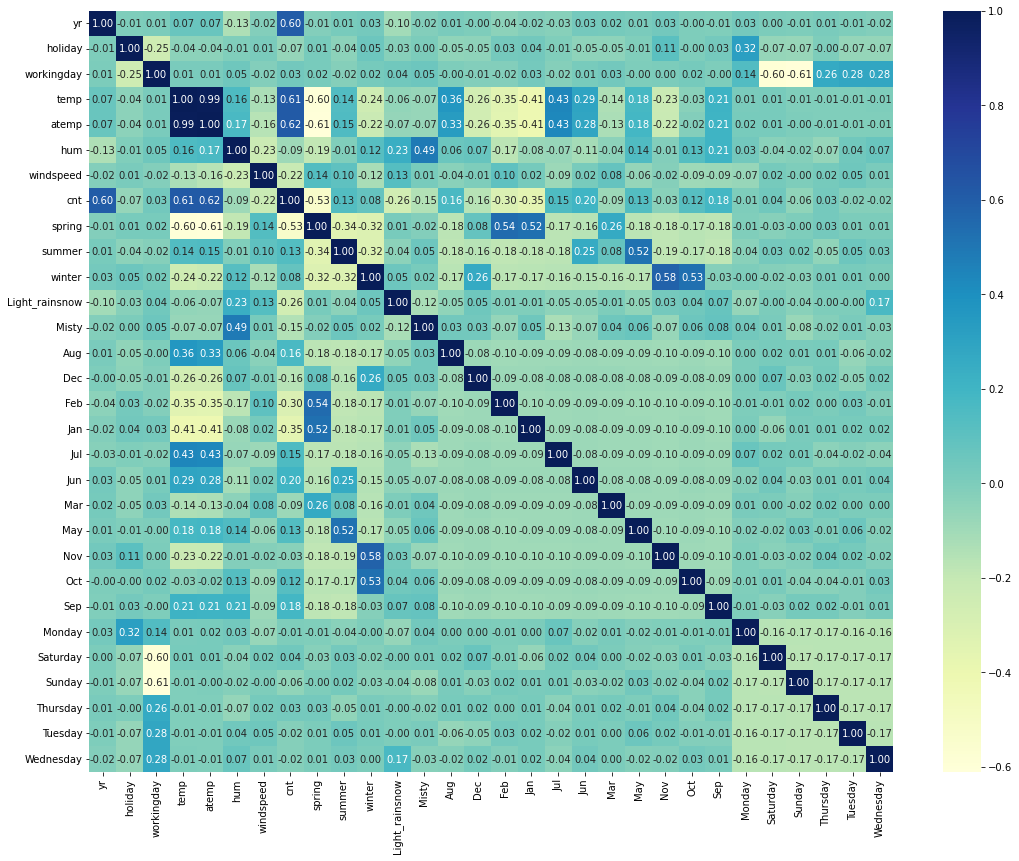

In [19]:
## Now let us check corrleation coefficient
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

In [21]:
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\sumanta.basak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 11),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 2),
 ('Sunday', False, 6),
 ('Thursday', False, 15),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12)]

In [23]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [24]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,325.34
1,temp,308.73
3,hum,24.18
4,windspeed,5.07
5,spring,4.90
6,winter,2.90
10,Feb,2.50
11,Jan,2.49
8,Misty,2.34
0,yr,2.16


In [25]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.06e-184
Time:                        12:31:41   Log-Likelihood:                 459.51
No. Observations:                 510   AIC:                            -887.0
Df Residuals:                     494   BIC:                            -819.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3663      0.036     10.

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
## First let's drop 'atemp'

X_train_rfe1 = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe1)

,Features,VIF
2,hum,22.77
1,temp,16.47
3,windspeed,5.04
4,spring,4.87
5,winter,2.87
9,Feb,2.49
10,Jan,2.48
7,Misty,2.31
0,yr,2.16
12,Nov,2.03


In [27]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.75e-186
Time:                        12:31:41   Log-Likelihood:                 459.26
No. Observations:                 510   AIC:                            -888.5
Df Residuals:                     495   BIC:                            -825.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3703      0.035     10.

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
## Now let's drop 'hum'

X_train_rfe2 = X_train_rfe1.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe2)

,Features,VIF
1,temp,5.37
2,windspeed,5.01
3,spring,4.48
4,winter,2.53
8,Feb,2.44
9,Jan,2.36
0,yr,2.14
11,Nov,1.96
6,Misty,1.56
7,Dec,1.52


In [29]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.60e-183
Time:                        12:31:41   Log-Likelihood:                 450.15
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     496   BIC:                            -813.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2735      0.027      9.

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
## Now let's drop 'temp'

X_train_rfe3 = X_train_rfe2.drop(['temp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe3)

,Features,VIF
2,spring,4.45
1,windspeed,2.87
3,winter,2.51
7,Feb,2.41
8,Jan,2.31
10,Nov,1.92
0,yr,1.86
5,Misty,1.52
6,Dec,1.49
11,Sep,1.15


In [31]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.74e-158
Time:                        12:31:41   Log-Likelihood:                 388.25
No. Observations:                 510   AIC:                            -750.5
Df Residuals:                     497   BIC:                            -695.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5463      0.016     34.

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
## Now let's drop 'Jul'

X_train_rfe4 = X_train_rfe3.drop(['Jul'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe4)

,Features,VIF
2,spring,4.39
1,windspeed,2.70
3,winter,2.49
7,Feb,2.41
8,Jan,2.31
9,Nov,1.92
0,yr,1.85
5,Misty,1.52
6,Dec,1.49
10,Sep,1.14


In [33]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.53e-159
Time:                        12:31:41   Log-Likelihood:                 387.55
No. Observations:                 510   AIC:                            -751.1
Df Residuals:                     498   BIC:                            -700.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5523      0.015     36.

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
## Now this looks like a good model
#Selecting model 'lr3' seems to be good, as  once we drop 'temp' (Marginally higher VIF than 5), the F-Statistic & Adj-R2 drops

# cnt = 0.2735 + (0.2662 x yr) + (0.4015 x temp)- (0.1327 x windspeed) - (0.0815 x spring) + (0.1012 x winter) 
# - (0.2964 x Light_rainsnow) - (0.0825 x Misty) - (0.0978 x Dec) - (0.0627 x Feb) - (0.0848 x Jan)
# - (0.0639 x Jul) - (0.1049 x Nov) + (0.0509 x Sep)

In [35]:
y_train_cnt = lr3.predict(X_train_lm3)

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

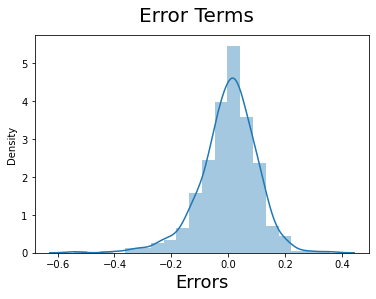

In [36]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

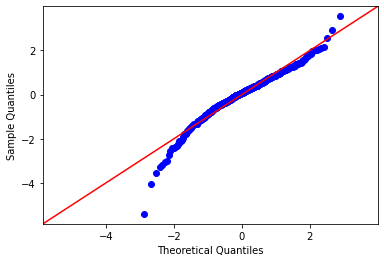

In [37]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

In [38]:
num_columns=['temp','atemp','hum','windspeed','cnt']
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head()

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
21,0,0,0,-0.049680,-0.026641,0.412194,0.308364,0.069061,1,0,...,0,0,0,0,0,1,0,0,0,0
321,0,0,1,0.236028,0.234324,0.422499,0.301278,0.371798,0,0,...,0,1,0,0,0,0,0,0,0,0
277,0,0,1,0.587011,0.577178,0.667669,0.319249,0.551858,0,0,...,0,0,1,0,0,0,0,0,0,1
523,1,0,1,0.734271,0.672486,0.482181,0.315400,0.917253,0,1,...,0,0,0,0,0,0,0,0,0,0
131,0,0,1,0.582583,0.572091,0.770287,0.344847,0.556630,0,1,...,1,0,0,0,0,0,0,1,0,0


In [39]:
y_test = df_test.pop('cnt')
X_test = df_test

In [40]:
#Selecting the variables that were part of final model.
col1=X_train_rfe2.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)

X_test_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 21 to 480
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   temp            219 non-null    float64
 3   windspeed       219 non-null    float64
 4   spring          219 non-null    uint8  
 5   winter          219 non-null    uint8  
 6   Light_rainsnow  219 non-null    uint8  
 7   Misty           219 non-null    uint8  
 8   Dec             219 non-null    uint8  
 9   Feb             219 non-null    uint8  
 10  Jan             219 non-null    uint8  
 11  Jul             219 non-null    uint8  
 12  Nov             219 non-null    uint8  
 13  Sep             219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(10)
memory usage: 10.7 KB


C:\Users\sumanta.basak\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Making predictions using the final model

y_pred = lr3.predict(X_test_lm3)

Text(0, 0.5, 'y_pred')

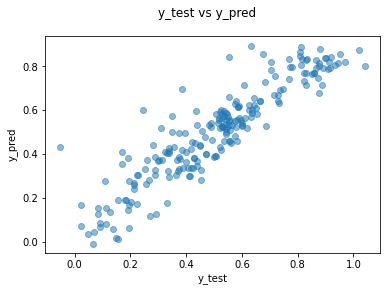

In [42]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [43]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train, y_train_cnt))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred))         # R score for test data

Train R-Score:  0.8328089849388187
Test R-Score:  0.8274419371211815


In [44]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0985

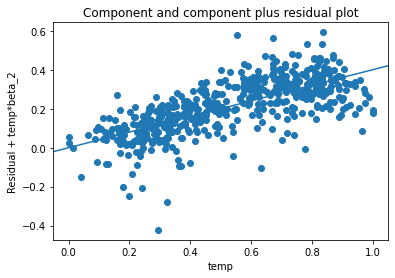

In [45]:
## Now validation of assumptions of linear regression

# 1 Linear relationship
sm.graphics.plot_ccpr(lr3, 'temp')
plt.show()

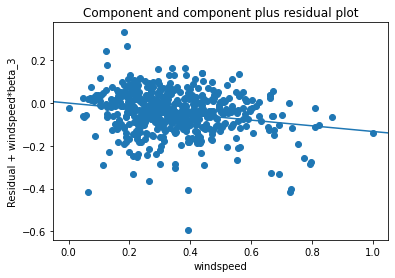

In [46]:
sm.graphics.plot_ccpr(lr3, 'windspeed')
plt.show()

C:\Users\sumanta.basak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


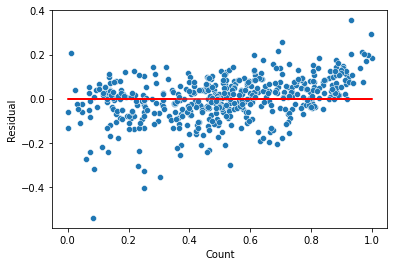

In [47]:
# 2 Homoscedasticity

y_train_pred = lr3.predict(X_train_lm3)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

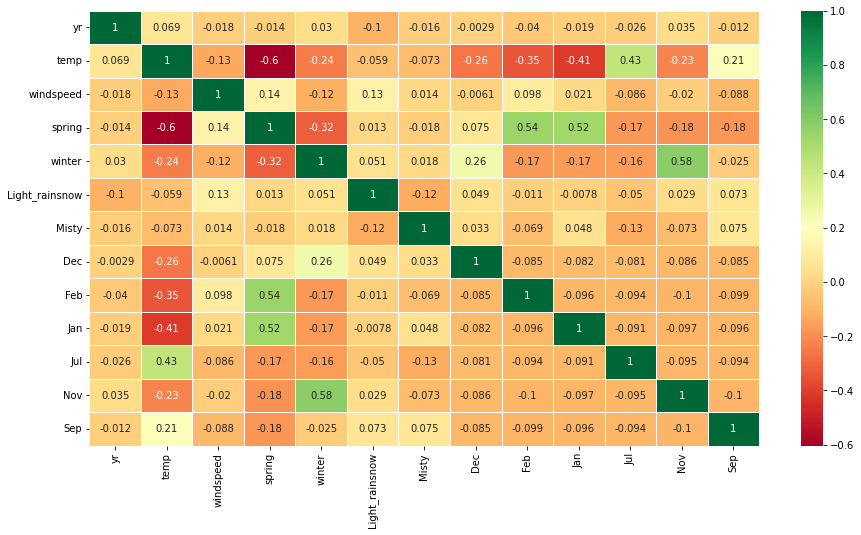

In [48]:
# 3 No multicollinearity

# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe2.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [49]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_rfe2)

,Features,VIF
1,temp,5.37
2,windspeed,5.01
3,spring,4.48
4,winter,2.53
8,Feb,2.44
9,Jan,2.36
0,yr,2.14
11,Nov,1.96
6,Misty,1.56
7,Dec,1.52


In [50]:
# 4 Independence of residuals
print('The Durbin-Watson value for Final Model lr 6 is', round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0363


C:\Users\sumanta.basak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


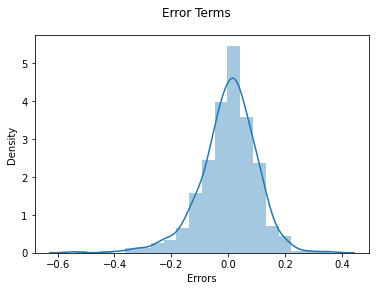

In [51]:
# 5 Normality of error
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

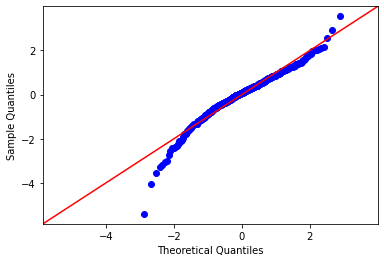

In [52]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()